In [1]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
import numpy as np

In [2]:
# Normalization function 
def norm_func(i):
    x = (i-i.min()) /(i.max() - i.min())
    return (x)

In [3]:
airlines=pd.read_csv(r"C:\Users\SAKET NANDAN\Documents\excel_R_lms\assignment_excelr\clustering_assignment\EastWestAirlines.csv")


In [4]:
airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [5]:
# Normalized data frame (considering the numerical part of data)
X=airlines.iloc[:,1:]
df_norm = norm_func(X)
df_norm.head(10)  # Top 10 rows

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
5,0.009631,0.0,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.836749,0.0
6,0.049808,0.0,0.50,0.0,0.0,0.104223,0.290698,0.000000,0.000000,0.843019,0.0
7,0.012233,0.0,0.00,0.0,0.0,0.019910,0.046512,0.008112,0.018868,0.836267,1.0
8,0.259850,0.0,0.50,0.5,0.0,0.006648,0.500000,0.124931,0.226415,0.837473,1.0
9,0.061507,0.0,0.50,0.0,0.0,0.107803,0.325581,0.037317,0.056604,0.835423,1.0


In [6]:
## Build the model

In [7]:
# Selecting 3 clusters from the above scree plot which is the optimum number of clusters 
model=KMeans(n_clusters=3) 
model.fit(df_norm)

model.labels_ # getting the labels of clusters assigned to each row 


array([0, 0, 0, ..., 1, 0, 0])

In [8]:
#md=pd.Series(model.labels_)  # converting numpy array into pandas series object 
airlines['Clust']=model.labels_ # creating a  new column and assigning it to new column 
airlines.head()


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [9]:
airlines.iloc[:,1:12].groupby(airlines.Clust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Clust,,,,,,,,,,,
0,40520.815442,89.978318,1.089900,1.017980,1.004231,3315.847171,6.463247,226.710735,0.658911,3605.113168,0.0
1,97053.051317,240.196489,2.661715,1.015530,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.0
2,117976.519936,80.437002,3.561404,1.001595,1.022329,31073.451356,17.224880,225.030303,0.633174,4470.706539,0.0


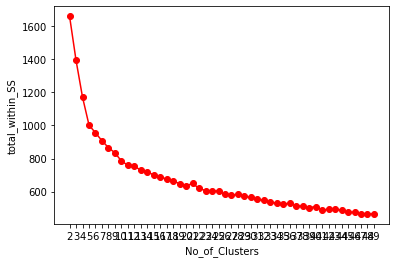

In [10]:
###### scree plot or elbow curve ############
k = list(range(2,50))
# variable for storing total within sum of squares for each kmeans 
TWSS = [] 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    # variable for storing within sum of squares for each cluster 
    WSS = [] 
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))
# Scree plot 
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)
plt.show()

so in above plot its shows that there os not much significance of loss function after 7 clusters so we will make our final medel 
with k value=7

# model with no of clusters=7

In [12]:
airlines1=pd.read_csv(r"C:\Users\SAKET NANDAN\Documents\excel_R_lms\assignment_excelr\clustering_assignment\EastWestAirlines.csv")

In [13]:
# Normalized data frame (considering the numerical part of data)
X1=airlines1.iloc[:,1:]
df_norm1 = norm_func(X1)
df_norm1.head(10)  # Top 10 rows

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
5,0.009631,0.0,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.836749,0.0
6,0.049808,0.0,0.50,0.0,0.0,0.104223,0.290698,0.000000,0.000000,0.843019,0.0
7,0.012233,0.0,0.00,0.0,0.0,0.019910,0.046512,0.008112,0.018868,0.836267,1.0
8,0.259850,0.0,0.50,0.5,0.0,0.006648,0.500000,0.124931,0.226415,0.837473,1.0
9,0.061507,0.0,0.50,0.0,0.0,0.107803,0.325581,0.037317,0.056604,0.835423,1.0


In [14]:
## Build the model with seven clusters

In [15]:
# Selecting 7 clusters from the above scree plot which is the optimum number of clusters 
model1=KMeans(n_clusters=7) 
model1.fit(df_norm1)

model1.labels_ # getting the labels of clusters assigned to each row 


array([4, 4, 4, ..., 6, 1, 1])

In [16]:
#md=pd.Series(model.labels_)  # converting numpy array into pandas series object 
airlines1['Clust']=model1.labels_ # creating a  new column and assigning it to new column 
airlines1.head()


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,4
1,2,19244,0,1,1,1,215,2,0,0,6968,0,4
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,4
3,4,14776,0,1,1,1,500,1,0,0,6952,0,4
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2


In [17]:
airlines1.iloc[:,1:12].groupby(airlines1.Clust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Clust,,,,,,,,,,,
0,105350.932515,360.935583,1.156442,1.030675,1.018405,9016.325153,10.812883,1024.573620,3.269939,6061.484663,1.0
1,33097.301357,94.131783,1.070736,1.016473,1.006783,3244.520349,6.173450,212.850775,0.603682,1992.402132,0.0
2,151963.560322,231.812332,4.415550,1.002681,1.042895,62335.439678,22.176944,912.680965,2.761394,6245.297587,1.0
3,118297.325243,73.467638,3.584142,1.001618,1.022654,31384.393204,17.233010,224.100324,0.627832,4419.553398,0.0
4,49921.633641,89.903226,1.122120,1.019585,1.001152,3467.074885,6.913594,243.834101,0.728111,5567.925115,0.0
5,63028.000000,224.236311,1.155620,1.034582,1.000000,8694.507205,10.161383,1035.317003,3.034582,2720.501441,1.0
6,70892.048276,169.632184,3.487356,1.000000,1.011494,31267.779310,18.508046,543.133333,1.611494,3678.535632,1.0


In [18]:
# creating a csv file 
airlines1.to_csv("airlines_after_clustering_kmeans.csv",index=False) #,encoding="utf-8")